# Assignment 10

In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Naman
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Naman
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
paragraph = """Technology has transformed the way we live, work, and communicate. 
From smartphones to artificial intelligence, innovation continues to shape our future. 
The internet nnects people across the globe in an instant. 
Automation and macochine learning are changing industries and creating new opportunities. 
While technology can sometimes feel overwhelming, it offers incredible tools for solving real-world problems.""";

text_lower = paragraph.lower();
text_clean = text_lower.translate(str.maketrans('', '', string.punctuation));
print("Text in lowercase with removed punctuation is\n",text_clean);

words = word_tokenize(text_clean);
print("\nWord tokenization\n",words);
sentences = sent_tokenize(paragraph);
print("\nSentence tokenization\n",sentences);


word = word_tokenize(text_lower);
print("\nWord tokenization\n",word);
split = text_lower.split();
print("\n Split using python function\n",split);

stop_words = set(stopwords.words('english'));
filtered_words = [word for word in words if word not in stop_words];
print("\nText after removing stop words is\n",filtered_words);

freq_dist = FreqDist(filtered_words)
print("\nWord Frequency Counts\n");
for word, freq in freq_dist.items():
    print(f"{word}: {freq}");



Text in lowercase with removed punctuation is
 technology has transformed the way we live work and communicate 
from smartphones to artificial intelligence innovation continues to shape our future 
the internet nnects people across the globe in an instant 
automation and macochine learning are changing industries and creating new opportunities 
while technology can sometimes feel overwhelming it offers incredible tools for solving realworld problems

Word tokenization
 ['technology', 'has', 'transformed', 'the', 'way', 'we', 'live', 'work', 'and', 'communicate', 'from', 'smartphones', 'to', 'artificial', 'intelligence', 'innovation', 'continues', 'to', 'shape', 'our', 'future', 'the', 'internet', 'nnects', 'people', 'across', 'the', 'globe', 'in', 'an', 'instant', 'automation', 'and', 'macochine', 'learning', 'are', 'changing', 'industries', 'and', 'creating', 'new', 'opportunities', 'while', 'technology', 'can', 'sometimes', 'feel', 'overwhelming', 'it', 'offers', 'incredible', 'tools

In [5]:
paragraph = """Technology is evolving faster than ever before. 
Smart devices are becoming essential parts of our daily lives. 
Artificial Intelligence helps businesses automate tasks and make smarter decisions. 
Virtual Reality is changing the way we experience games, movies, and education. 
Even healthcare is being transformed through wearable tech and data-driven diagnostics.""";

words_alpha = re.findall(r'\b[a-zA-Z]+\b', paragraph.lower());
print("Words with only alphabets (lowercase):\n", words_alpha)

stop_words = set(stopwords.words('english'));
filtered_words = [word for word in words_alpha if word not in stop_words];
print("\nFiltered Words (after removing stopwords):\n", filtered_words);

porter_stemmer = PorterStemmer();
stemmed_words = [porter_stemmer.stem(word) for word in filtered_words];
print("\nStemmed Words (using PorterStemmer):\n", stemmed_words);

lemmatizer = WordNetLemmatizer();
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words];
print("\nLemmatized Words (using WordNetLemmatizer):\n", lemmatized_words);

Words with only alphabets (lowercase):
 ['technology', 'is', 'evolving', 'faster', 'than', 'ever', 'before', 'smart', 'devices', 'are', 'becoming', 'essential', 'parts', 'of', 'our', 'daily', 'lives', 'artificial', 'intelligence', 'helps', 'businesses', 'automate', 'tasks', 'and', 'make', 'smarter', 'decisions', 'virtual', 'reality', 'is', 'changing', 'the', 'way', 'we', 'experience', 'games', 'movies', 'and', 'education', 'even', 'healthcare', 'is', 'being', 'transformed', 'through', 'wearable', 'tech', 'and', 'data', 'driven', 'diagnostics']

Filtered Words (after removing stopwords):
 ['technology', 'evolving', 'faster', 'ever', 'smart', 'devices', 'becoming', 'essential', 'parts', 'daily', 'lives', 'artificial', 'intelligence', 'helps', 'businesses', 'automate', 'tasks', 'make', 'smarter', 'decisions', 'virtual', 'reality', 'changing', 'way', 'experience', 'games', 'movies', 'education', 'even', 'healthcare', 'transformed', 'wearable', 'tech', 'data', 'driven', 'diagnostics']

Stem

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np;

texts = [
    "New tech innovations change the world every day.",
    "The best smartphone of 2025 is here, offering amazing features.",
    "Breaking news: Natural disaster causes widespread damage across the region."
];

vectorizer = CountVectorizer();
X_count = vectorizer.fit_transform(texts);
count_feature_names = vectorizer.get_feature_names_out();
print("Bag of Words Representation:");
print(X_count.toarray());
print("Feature Names (Words in BoW):", count_feature_names);

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(texts);
print("TF-IDF Scores: ");
print(X_tfidf.toarray());
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out();
print("Feature Names (Words in TF-IDF): ",tfidf_feature_names);

print("\nTop 3 Keywords (TF-IDF Scores) for each Text:");
for i, text in enumerate(texts):
    print(f"\nText {i + 1}: {text}");
    tfidf_scores = X_tfidf[i].toarray().flatten();
    top_indices = tfidf_scores.argsort()[-3:][::-1];
    top_keywords = [(tfidf_feature_names[idx], tfidf_scores[idx]) for idx in top_indices];
    print("Top 3 Keywords (Word, TF-IDF Score):");
    for keyword, score in top_keywords:
        print(f"'{keyword}': {score:.4f}");

Bag of Words Representation:
[[0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1]
 [1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0]
 [0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0]]
Feature Names (Words in BoW): ['2025' 'across' 'amazing' 'best' 'breaking' 'causes' 'change' 'damage'
 'day' 'disaster' 'every' 'features' 'here' 'innovations' 'is' 'natural'
 'new' 'news' 'of' 'offering' 'region' 'smartphone' 'tech' 'the'
 'widespread' 'world']
TF-IDF Scores: 
[[0.         0.         0.         0.         0.         0.
  0.36888498 0.         0.36888498 0.         0.36888498 0.
  0.         0.36888498 0.         0.         0.36888498 0.
  0.         0.         0.         0.         0.36888498 0.21786941
  0.         0.36888498]
 [0.32705548 0.         0.32705548 0.32705548 0.         0.
  0.         0.         0.         0.         0.         0.32705548
  0.32705548 0.         0.32705548 0.         0.         0.
  0.32705548 0.32705548 0.         0.32705548 0.         0.193164

In [7]:
import nltk;
import re;
from sklearn.feature_extraction.text import TfidfVectorizer;
from sklearn.metrics.pairwise import cosine_similarity;
nltk.download('punkt');

text_ai = """Artificial Intelligence (AI) is revolutionizing industries by automating tasks and improving decision-making. 
It uses machine learning algorithms to process large datasets and make predictions. AI applications range from self-driving cars to voice assistants, 
and it continues to evolve rapidly.""";
text_blockchain = """Blockchain is a decentralized ledger technology that ensures secure transactions without intermediaries. 
It is most commonly known for being the backbone of cryptocurrencies like Bitcoin. Blockchain’s transparency and security make it a powerful tool for various industries, 
from finance to supply chains.""";

def preprocess_text(text):
    text = text.lower(); 
    text = re.sub(r'[^\w\s]', '', text);
    tokens = nltk.word_tokenize(text);
    return tokens;
tokens_ai = preprocess_text(text_ai);
print("Tokens for AI:", tokens_ai, "\n");
tokens_blockchain = preprocess_text(text_blockchain);
print("Tokens for Blockchain:", tokens_blockchain);

def jaccard_similarity(tokens1, tokens2):
    set1, set2 = set(tokens1), set(tokens2);
    intersection = set1.intersection(set2);
    union = set1.union(set2);
    return len(intersection) / len(union);

jaccard_sim = jaccard_similarity(tokens_ai, tokens_blockchain)
print("\nJaccard Similarity:", jaccard_sim);

vectorizer = TfidfVectorizer();
texts = [text_ai, text_blockchain];
tfidf_matrix = vectorizer.fit_transform(texts);
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1]);
print("\nCosine Similarity:", cosine_sim[0][0]);

if jaccard_sim > cosine_sim:
    print("\nJaccard Similarity gives better insights in this case.");
else:
    print("\nCosine Similarity gives better insights in this case.");


Tokens for AI: ['artificial', 'intelligence', 'ai', 'is', 'revolutionizing', 'industries', 'by', 'automating', 'tasks', 'and', 'improving', 'decisionmaking', 'it', 'uses', 'machine', 'learning', 'algorithms', 'to', 'process', 'large', 'datasets', 'and', 'make', 'predictions', 'ai', 'applications', 'range', 'from', 'selfdriving', 'cars', 'to', 'voice', 'assistants', 'and', 'it', 'continues', 'to', 'evolve', 'rapidly'] 

Tokens for Blockchain: ['blockchain', 'is', 'a', 'decentralized', 'ledger', 'technology', 'that', 'ensures', 'secure', 'transactions', 'without', 'intermediaries', 'it', 'is', 'most', 'commonly', 'known', 'for', 'being', 'the', 'backbone', 'of', 'cryptocurrencies', 'like', 'bitcoin', 'blockchains', 'transparency', 'and', 'security', 'make', 'it', 'a', 'powerful', 'tool', 'for', 'various', 'industries', 'from', 'finance', 'to', 'supply', 'chains']

Jaccard Similarity: 0.109375

Cosine Similarity: 0.1772053000124084

Cosine Similarity gives better insights in this case.


[nltk_data] Downloading package punkt to C:\Users\Naman
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


I recently tried the Anker Soundcore Life Q30 headphones, and they genuinely exceeded my expectations. The sound quality is crisp with deep bass, and the active noise cancellation works surprisingly well for the price. It’s okay; some features are useful, but others feel unnecessary.


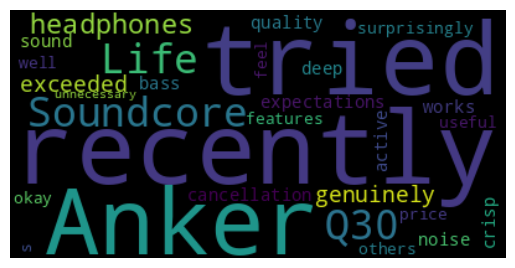

In [39]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
review1 = "I recently tried the Anker Soundcore Life Q30 headphones, and they genuinely exceeded my expectations. The sound quality is crisp with deep bass, and the active noise cancellation works surprisingly well for the price."
review2 = "It’s okay; some features are useful, but others feel unnecessary."
review3 = "The new update made the app crash frequently, and I lost all my saved data. Very frustrating experience."
reviews = [review1,review2,review3]

results = []
for review in reviews:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    if polarity > 0.1:
        sentiment = 'Positive'
    elif polarity < -0.1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    results.append({
        'review': review,
        'polarity': polarity,
        'subjectivity': subjectivity,
        'sentiment': sentiment
    })

positive_review = " ".join(r['review'] for r in results if r['sentiment'] == 'Positive')
print(positive_review)
wc = WordCloud().generate(positive_review)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

text = (
    "Sunlight streamed through the open window, painting the wooden floor with golden patterns. "
    "The gentle hum of morning filled the room as birds sang in the garden outside. "
    "A soft breeze carried the scent of fresh dew and blooming flowers. "
    "On the desk, a notebook lay open, pages fluttering slightly, waiting to be filled with thoughts and dreams. "
    "The promise of a new day felt tangible, each moment brimming with potential. "
    "In that quiet stillness, inspiration stirred, urging pen to paper. "
    "It was a simple morning, yet within its calm beauty lay the seeds of countless stories waiting to be told."
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]
for i in range(1, len(token_list)):
    n_gram_seq = token_list[: i + 1]
    input_sequences.append(n_gram_seq)

max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre")

X = input_sequences[:, :-1]
labels = input_sequences[:, -1]
y = to_categorical(labels, num_classes=total_words)

model = Sequential([
    Embedding(input_dim=total_words, output_dim=50, input_length=max_seq_len - 1),
    LSTM(100),
    Dense(total_words, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X, y, epochs=100, verbose=1)

def generate_text(seed_text, next_words, model, tokenizer, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding="pre")
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=1)[0]
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                seed_text += " " + word
                break
    return seed_text

seed = "morning"
print(generate_text(seed, 30, model, tokenizer, max_seq_len))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.0182 - loss: 4.3308
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0839 - loss: 4.3213
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1141 - loss: 4.3123
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0777 - loss: 4.2975
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0891 - loss: 4.2367
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1173 - loss: 4.1445
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0985 - loss: 4.1238
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0860 - loss: 4.1597
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1047 - loss: 4.0902
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0995 - loss: 4.0945
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0891 - loss: 4.0688
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1141 - lo